In [6]:
import serial
import matplotlib.pyplot as plt

#Collecting data from serial port and convert to list of decimal integers

SerialData = serial.Serial('com3',115200)
count = 0
ListData = []

while (count<115200):
    ListData.append(SerialData.read())
    count += 1

SerialData.close()

CleanData = []
for i in range(len(ListData)):
    CleanData.append(int.from_bytes(ListData[i], "big"))
print(CleanData)

[131, 131, 132, 135, 138, 143, 145, 141, 135, 125, 120, 115, 112, 115, 121, 124, 136, 138, 137, 136, 126, 120, 116, 110, 111, 116, 122, 130, 134, 137, 136, 132, 126, 124, 119, 120, 175, 111, 255, 128, 130, 127, 128, 129, 127, 126, 125, 126, 125, 124, 124, 121, 124, 123, 122, 123, 124, 124, 124, 126, 126, 127, 126, 127, 126, 126, 128, 126, 126, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 126, 125, 125, 128, 128, 127, 129, 129, 131, 132, 134, 135, 139, 133, 130, 142, 133, 125, 130, 127, 126, 121, 120, 122, 120, 121, 120, 119, 125, 123, 121, 125, 127, 127, 127, 126, 130, 130, 129, 128, 129, 130, 130, 127, 126, 128, 126, 126, 125, 125, 125, 125, 124, 125, 124, 127, 125, 125, 127, 129, 126, 129, 127, 127, 128, 126, 126, 128, 126, 126, 125, 126, 126, 124, 126, 126, 124, 127, 125, 126, 127, 127, 129, 127, 129, 129, 129, 129, 129, 132, 131, 133, 133, 135, 135, 134, 132, 133, 133, 127, 131, 126, 126, 124, 121, 123, 121, 122, 121, 121, 124, 123, 125, 126, 128, 128, 128, 129, 131, 131, 129,

In [3]:
CleanData = []
for i in range(len(ListData)):
    CleanData.append(int.from_bytes(ListData[i], "big"))
print(CleanData)

[126, 126, 127, 126, 127, 126, 127, 127, 239, 239, 207, 255, 125, 125, 126, 125, 125, 126, 125, 126, 124, 126, 124, 125, 125, 125, 126, 125, 126, 125, 126, 126, 125, 126, 126, 127, 125, 127, 126, 126, 127, 127, 127, 126, 128, 126, 126, 127, 126, 127, 126, 128, 127, 127, 126, 128, 127, 127, 128, 128, 128, 127, 127, 128, 125, 127, 126, 127, 125, 127, 127, 126, 127, 127, 126, 126, 127, 127, 127, 127, 127, 127, 126, 127, 127, 126, 128, 126, 128, 126, 128, 126, 127, 126, 126, 127, 125, 127, 127, 127, 126, 127, 127, 127, 128, 126, 128, 127, 128, 128, 128, 129, 128, 129, 127, 129, 129, 127, 130, 128, 129, 127, 128, 128, 127, 128, 127, 128, 126, 127, 127, 127, 127, 128, 129, 127, 128, 127, 128, 128, 127, 128, 127, 128, 128, 128, 127, 128, 128, 127, 128, 128, 127, 127, 127, 127, 128, 128, 127, 128, 127, 127, 128, 128, 128, 127, 128, 128, 128, 128, 128, 128, 127, 128, 127, 128, 127, 127, 127, 127, 129, 127, 128, 128, 128, 128, 128, 129, 127, 128, 128, 128, 129, 128, 129, 128, 129, 128, 128, 129,

In [9]:
from scipy.io.wavfile import read, write
import io
import numpy

BytesData = numpy.array(CleanData, 'uint8')
print(BytesData)
#bytes_wav = bytes()
#byte_io = io.BytesIO(bytes_wav)
write('output.wav', 9000, BytesData)

#output_wav = byte_io.read()

[131 131 132 ... 127 126 127]


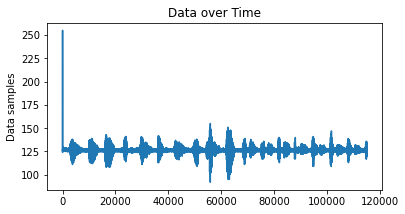

In [5]:
#Creating plot from data
    
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.clear()
ax.plot(range(len(CleanData)), CleanData)
plt.subplots_adjust(bottom=0.30)
plt.title('Data over Time')
plt.ylabel('Data samples')
plt.show()